In [1]:
import os

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
df = pd.read_csv("student_performance_250.csv")
df.head()

,Student_ID,Name,Marks,Attendance,Logins
0,S001,Student_001,67.45,67.39,11
1,S002,Student_002,57.93,89.18,11
2,S003,Student_003,69.72,100.00,5
3,S004,Student_004,82.85,90.32,7
4,S005,Student_005,56.49,64.81,7


In [6]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  250 non-null    object 
 1   Name        250 non-null    object 
 2   Marks       250 non-null    float64
 3   Attendance  250 non-null    float64
 4   Logins      250 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.9+ KB
None

Summary Statistics:
            Marks  Attendance      Logins
count  250.000000  250.000000  250.000000
mean    59.889280   80.087920    9.948000
std     14.238231    9.806991    3.163753
min     20.700000   47.590000    2.000000
25%     49.812500   72.940000    7.000000
50%     60.885000   79.985000   10.000000
75%     68.740000   86.790000   12.000000
max    100.000000  100.000000   19.000000


In [7]:
at_risk = df[(df["Marks"] < 40) | (df["Attendance"] < 75) | (df["Logins"] < 5)]
print(f"\nNumber of at-risk students: {len(at_risk)}")
at_risk.head()


Number of at-risk students: 98


,Student_ID,Name,Marks,Attendance,Logins
0,S001,Student_001,67.45,67.39,11
4,S005,Student_005,56.49,64.81,7
7,S008,Student_008,71.51,72.92,6
10,S011,Student_011,53.05,70.73,13
12,S013,Student_013,63.63,47.59,10


In [8]:
avg_marks = df["Marks"].mean()
avg_attendance = df["Attendance"].mean()
avg_logins = df["Logins"].mean()

In [9]:
print(f"\nAverage Marks: {avg_marks:.2f}")
print(f"Average Attendance: {avg_attendance:.2f}")
print(f"Average Logins: {avg_logins:.2f}")


Average Marks: 59.89
Average Attendance: 80.09
Average Logins: 9.95


In [10]:
correlation = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
               Marks  Attendance    Logins
Marks       1.000000   -0.009604  0.051484
Attendance -0.009604    1.000000  0.114108
Logins      0.051484    0.114108  1.000000


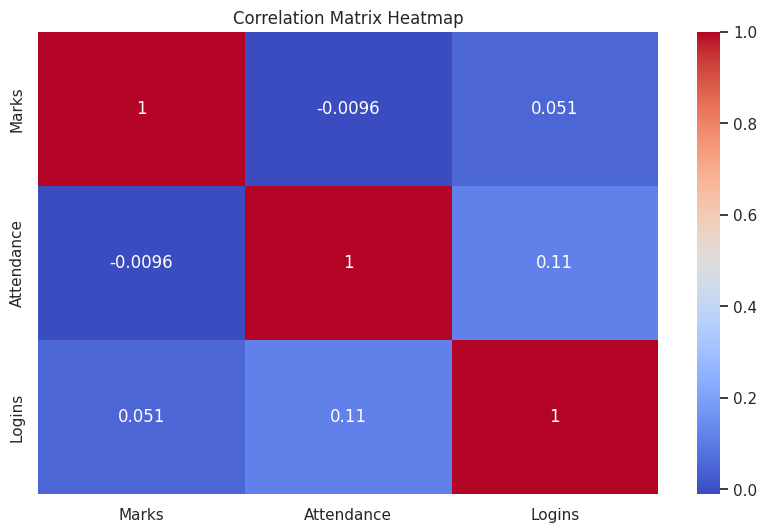

In [13]:
## Heatmap of Correlation
## Heatmap of Correlation
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

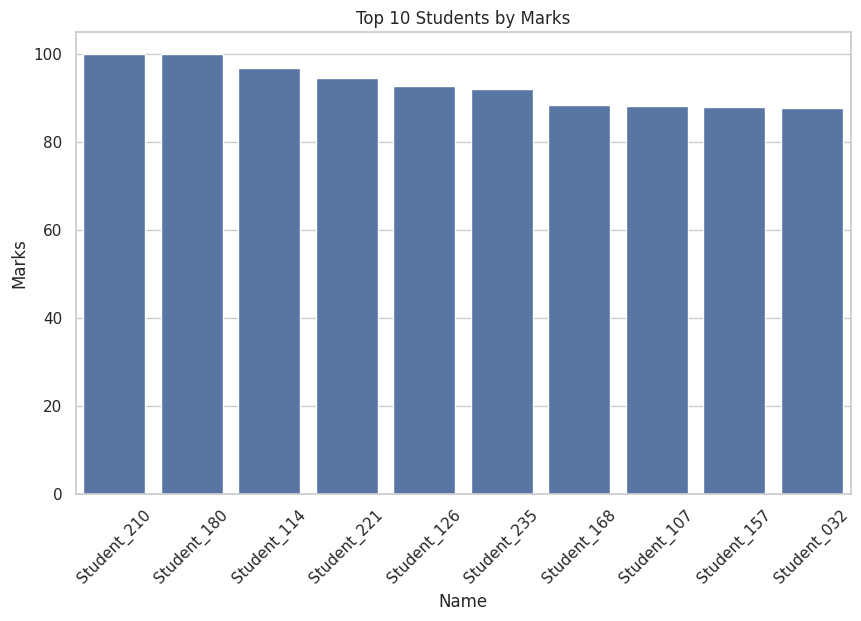

In [14]:
# Top 10 by Marks
top_students = df.sort_values(by="Marks", ascending=False).head(10)
sns.barplot(x="Name", y="Marks", data=top_students)
plt.xticks(rotation=45)
plt.title("Top 10 Students by Marks")
plt.show()

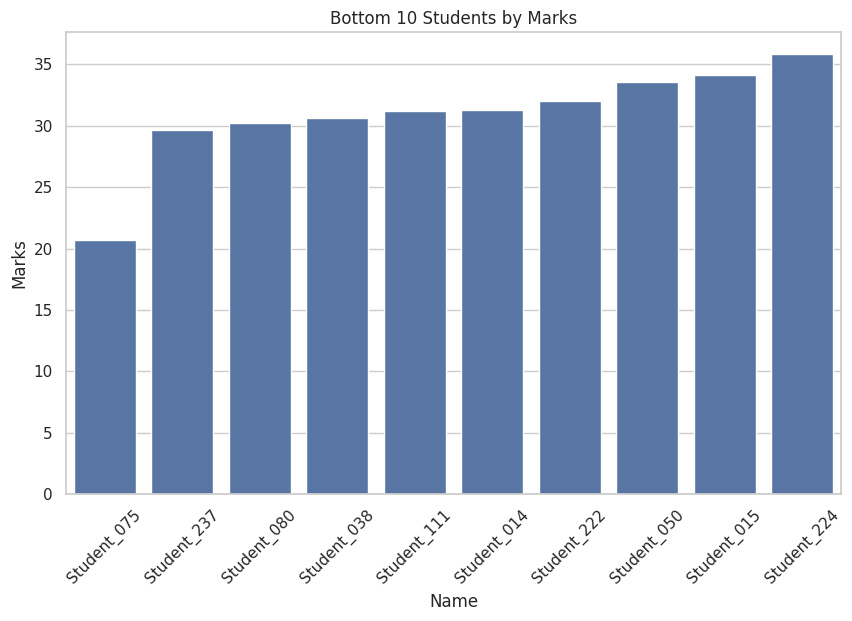

In [15]:
# Bottom 10 by Marks
bottom_students = df.sort_values(by="Marks").head(10)
sns.barplot(x="Name", y="Marks", data=bottom_students)
plt.xticks(rotation=45)
plt.title("Bottom 10 Students by Marks")
plt.show()

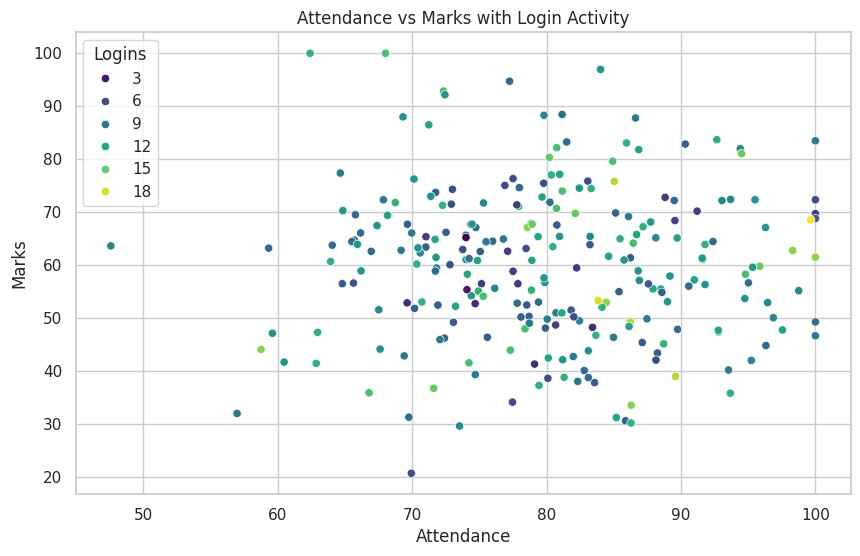

In [16]:
sns.scatterplot(data=df, x="Attendance", y="Marks", hue="Logins", palette="viridis")
plt.title("Attendance vs Marks with Login Activity")
plt.show()